# Homework 7: Studying Employee Attrition With K-Means

Name: Mahoto Sasaki

Student ID: 467695

Collaborators:


## Instructions

In this homework, we will be exploring a more realistic application of clustering. It might be helpful to review **Lab 7 (K-Means Clustering)** first. Most of the things we ask you to do in this homework are explained in the lab. In general, you should feel free to import any package that we have previously used in class. Ensure that all plots have the necessary components that a plot should have (e.g. axes labels, a title, a legend).

Furthermore, in addition to recording your collaborators on this homework, please also remember to cite/indicate all external sources used when finishing this assignment. This includes peers, TAs, and links to online sources. Note that these citations will not free you from your obligation to submit your _own_ code and write-ups, however, they will be taken into account during the grading and regrading process.

### Submission instructions
* Submit this python notebook including your answers in the code cells as homework submission.
* **Feel free to add as many cells as you need to** — just make sure you don't change what we gave you. 
* **Does it spark joy?** Note that you will be partially graded on the presentation (_cleanliness, clarity, comments_) of your notebook so make sure you [Marie Kondo](https://lifehacker.com/marie-kondo-is-not-a-verb-1833373654) your notebook before submitting it.

## 1. The Initial Centroids Matter!

The $k$-means algorithm is sensitive to the initial starting points. In this section, let's explore this. For a toy dataset with some more clusters.

In [88]:
from utility.util import load_toy, configure_plots
from utility.lab import sample_centroids, fit, plot_kmeans

# run this cell twice to have pretty plots
configure_plots()

X, _ = load_toy(500, 5, width=0.07, random_state=4)

### Problem 1.1

Let's take a quick peek at what the data looks like.

**Try this!** Plot the toy data $X$. Make sure that your plot has the necessary components.

Text(0.5, 1.0, 'Toy Data')

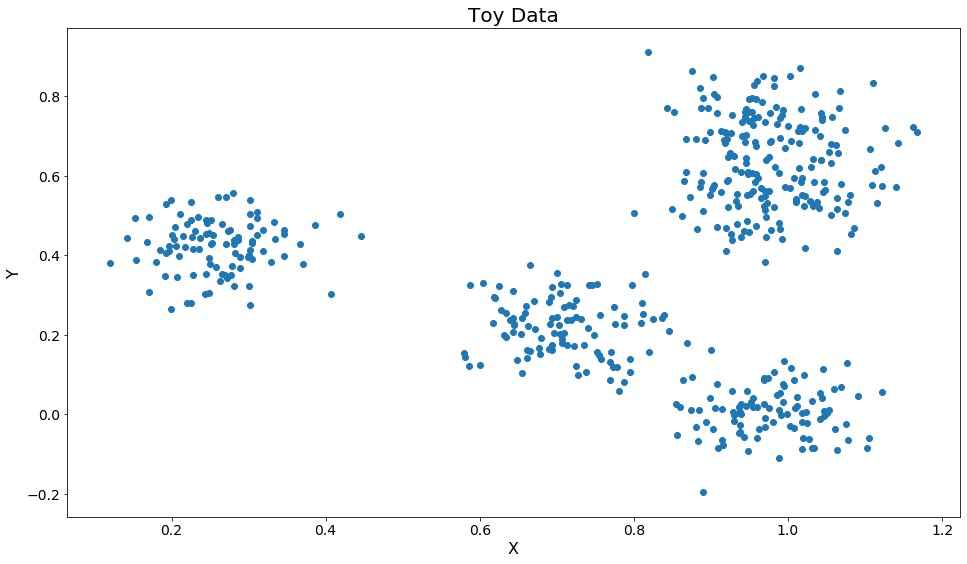

In [89]:
# your code here
import matplotlib.pyplot as plt #_ represents the number of groups k
plt.scatter(X[:,0], X[:,1])
plt.xlabel("X")
plt.ylabel("Y")
plt.title("Toy Data")

### Problem 1.2

**Try this!** Using the functions `sample_centroids`, `fit`, and `plot_kmeans`, experiment with different `random_state`s to see if you can observe different final centroids depending on the initial starting points. Use the data sampled above and produce two plots in the two code cells provided below; one of them should show a reasonabley nice $k$-means solution. 

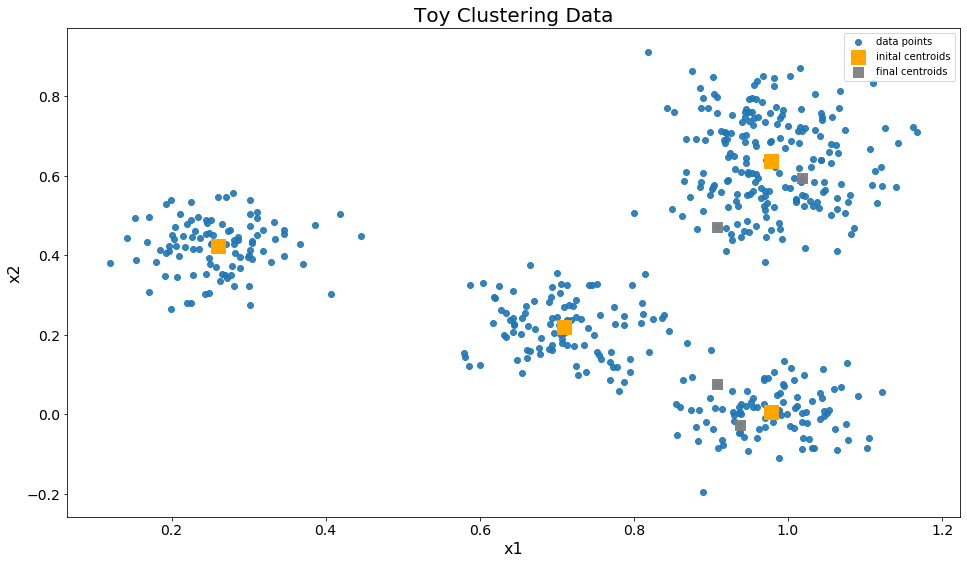

In [90]:
# your code here
import numpy as np

#k=kArray.shape[0]
k = 4
old_centroids = sample_centroids(X, k, random_state=1)
#print(old_centroids)
centroids = fit(X, k, initial=old_centroids, random_state=1)
# print(centroids[0])
plot_kmeans(X, centroids[0], prev_centroids=old_centroids)

# centroids = sample_centroids(X, k, random_state=None)
# fitcentroids, assignments = fit(X, k)
# plot_kmeans(X, centroids, assignments = _)
# plot_kmeans(X, fitcentroids, assignments = assignments)

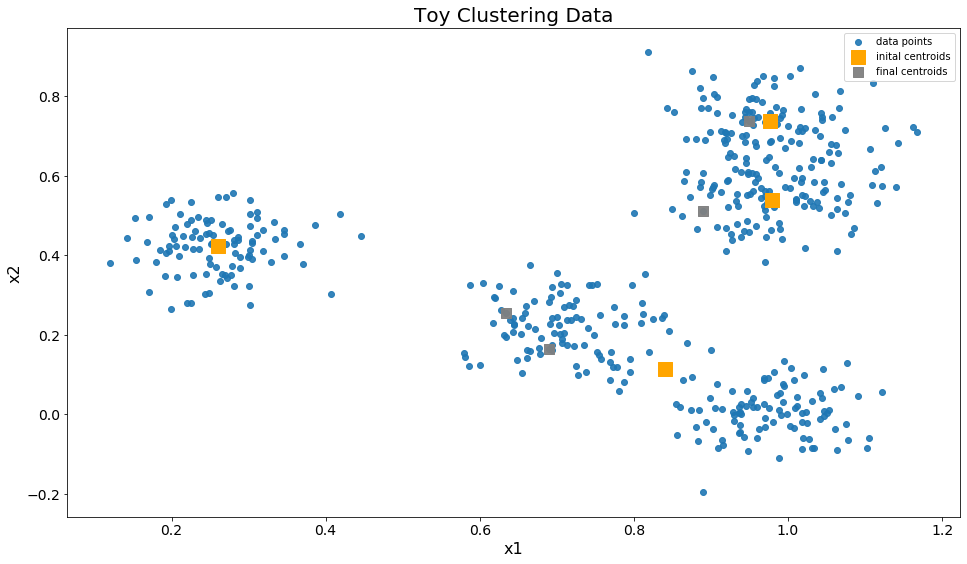

In [91]:
# your code here
old_centroids = sample_centroids(X, k, random_state=3)
centroids = fit(X, k, initial=old_centroids, random_state=3)
plot_kmeans(X, centroids[0], prev_centroids=old_centroids)

### Problem 1.3

**Write-up!** What might be causing this to happen? How might we better choose our initial centroids? 

## 2. Using `sklearn` for $k$-means 

In this section, we will explore the [$k$-means model from `sklearn`](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html) and discuss some of the additional features supplied by their implementation. Before we begin, it is suggested that you work through Lab 7 if you haven't already as we will assume familiarity with the terms used there.

### Looking Into the Model

Now let's create a new $k$-means model and learn about it's interface. In general, you will find that the $k$-means model from `sklearn` shares a lot of the same methods as the other models that we have looked at. However, there are some differences that are notable.

In [92]:
from sklearn.cluster import KMeans

model = KMeans()

### Problem 2.1

**Write-up!** Use the IPython `?` operator to answer the following question: how do you specify the number of clusters you would like to fit?

In [93]:
# use this cell to explore
model?

Type:        KMeans
String form:
KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=8, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)
File:        /Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/cluster/_kmeans.py
Docstring:  
K-Means clustering.

Read more in the :ref:`User Guide <k_means>`.

Parameters
----------

n_clusters : int, default=8
    The number of clusters to form as well as the number of
    centroids to generate.

init : {'k-means++', 'random'} or ndarray of shape             (n_clusters, n_features), default='k-means++'
    Method for initialization, defaults to 'k-means++':

    'k-means++' : selects initial cluster centers for k-mean
    clustering in a smart way to speed up convergence. See section
    Notes in k_init for more details.

    'random': choose k observations (rows) at random from data for
    the initial centroids.

    If a

### Problem 2.2

**Write-up!** Use the IPython `?` operator to answer the following questions: How does the model initialize centroids by default? How does it work and why is it better than randomly choosing random starting centroids?

In [94]:
# use this cell to explore
model.init?

Type:        str
String form: k-means++
Length:      9
Docstring:  
str(object='') -> str
str(bytes_or_buffer[, encoding[, errors]]) -> str

Create a new string object from the given object. If encoding or
errors is specified, then the object must expose a data buffer
that will be decoded using the given encoding and error handler.
Otherwise, returns the result of object.__str__() (if defined)
or repr(object).
encoding defaults to sys.getdefaultencoding().
errors defaults to 'strict'.


### Problem 2.3

**Write-up!** Use the IPython `?` operator to answer the following questions: How does the model decide that the centroids have converged? Why might we need to adjust this based on our input data.

In [95]:
# use this cell to explore
model.n_init?

Type:        int
String form: 10
Docstring:  
int([x]) -> integer
int(x, base=10) -> integer

Convert a number or string to an integer, or return 0 if no arguments
are given.  If x is a number, return x.__int__().  For floating point
numbers, this truncates towards zero.

If x is not a number or if base is given, then x must be a string,
bytes, or bytearray instance representing an integer literal in the
given base.  The literal can be preceded by '+' or '-' and be surrounded
by whitespace.  The base defaults to 10.  Valid bases are 0 and 2-36.
Base 0 means to interpret the base from the string as an integer literal.
>>> int('0b100', base=0)
4


### Clustering the Toy Data with `sklearn`

Let's try using `sklearn` to cluster our data.

### Problem 3.1

**Try this!** Create and fit a _new_ `KMeans` model of our data with the default arguments except for `random_state` which should be set to 11. _Be sure to store the fit centroids and assignments in variables for use later._

In [96]:
# your code here
model = KMeans(random_state=11).fit(X)
centroids = model.cluster_centers_
#print(centroids.shape)
assignments = model.labels_

a = np.zeros(8)
for i in range(centroids.shape[0]):
    a[i] = np.sum(assignments == i)
print(a)


[ 51.  63. 100.  84.  52.  53.  46.  51.]


**Write-up!** How many centroids were fit by the model? How many points were assigned to each cluster?

### Problem 3.2

**Try this!** Create a plot showing the centroids that were produced by the model and the data points colored by their cluster assignment. Be sure to include any necessary plot components and remember that presentation matters.

Text(0.5, 1.0, 'Toy Data')

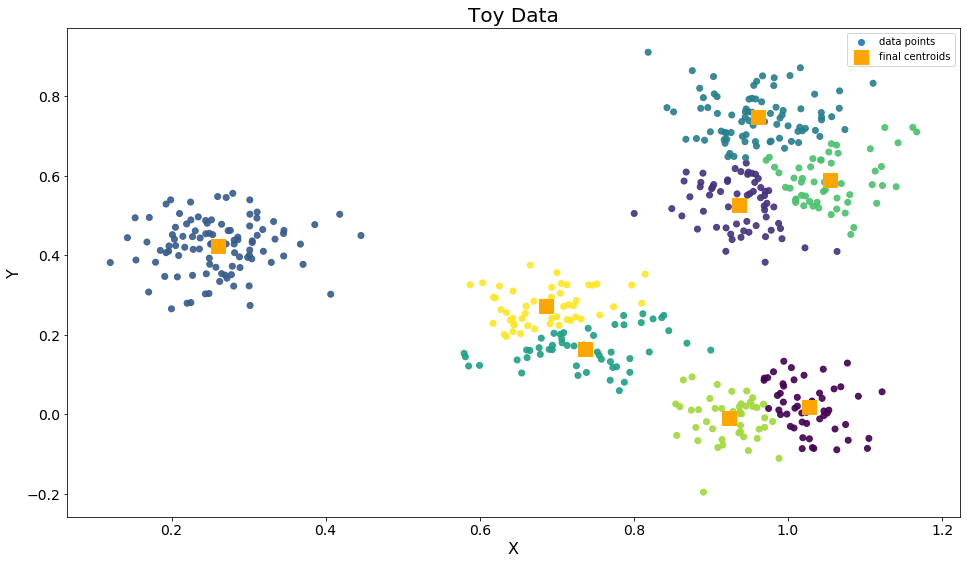

In [97]:
# your code here
import matplotlib.pyplot as plt #_ represents the number of groups k

plt.scatter(X[:, 0], X[:, 1], c=assignments, alpha=0.9)
plt.scatter(centroids[:, 0], centroids[:, 1], s=200, c='orange', marker='s')
plt.legend(['data points', 'final centroids'])

plt.title('Toy Clustering Data')
plt.xlabel('x1')
plt.ylabel('x2')

plt.xlabel("X")
plt.ylabel("Y")
plt.title("Toy Data")

**Write-up!** Given this plot, do you think this is a reasonable clustering of the data?

### Problem 3.3

Consider the Sum of Squared Distances $SSD_j$ as the sum of all points in the $j$th cluster to its corresponsing cluster center $c_j$: 
$$SSD_j = \sum_{i=1}^{n} z_{ij} \;d(x_i,c_j)^2,$$
where $z_{ij}$ is 1 if $x_i$ belongs to cluster $j$ and 0 otherwise. 

Then, the objective function that $k$-means optimizes is the sum of the $SSD_j$ over all clusters. This means that, we want to find clusters of points that are close to one another. We can estimate how close the cluster points are to one another by measuring how far each point assigned to the cluster is from its center.


**Try this!** Use the elbow method described in both lecture and Lab 7 to find a good clustering for our data. Produce a plot that shows the model performance $SSD(k)$ as a function of $k$, where $SSD(k) = \sum_{j=1}^k SSD_j$.  Make sure to create new models when appropriate.

Text(0.5, 1.0, 'Objective Function for Toy Data')

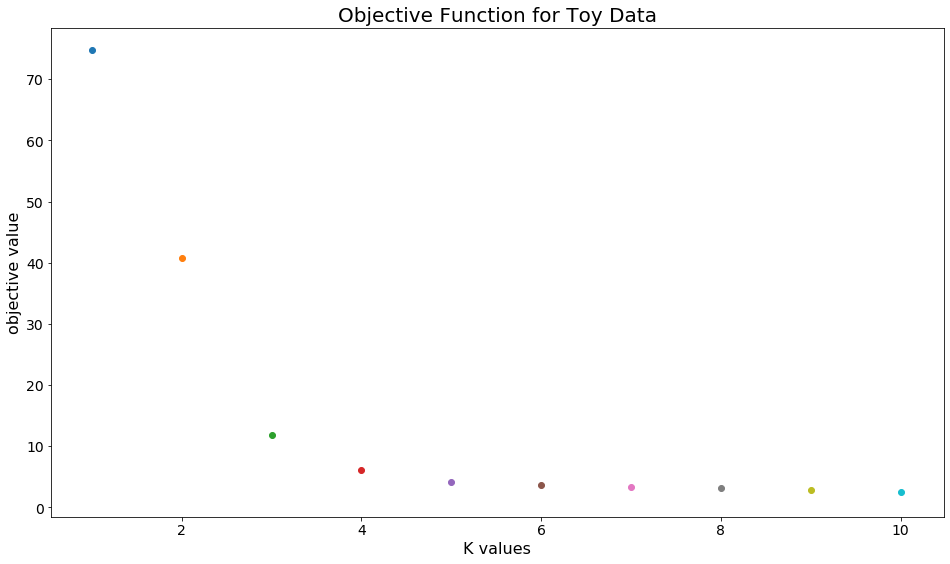

In [98]:
from utility.util import distance_measure

# your code here
for i in range(10):
    model1 = KMeans(n_clusters = i+1, random_state=11).fit(X)
    i1 = model1.inertia_
    plt.scatter(i+1, i1)

plt.xlabel("K values")
plt.ylabel("objective value")
plt.title("Objective Function for Toy Data")

**Write-up!** State which $k$ you would choose and explain why. 

## 3. Tackling Employee Attrition


A real problem that Human Resources (HR) departments in companies across the work would like to address is employee attrition, or turnover. They would like to reduce the number of employees who leave the company as hiring new employees is expensive. In this section, we would like to see if we can make use of $k$-means to identify patterns in employee attrition so that we might suggest which areas an HR department should intervene in.

To show off there shiny Watson platform, IBM released a (fictional) [sample dataset](https://www.ibm.com/communities/analytics/watson-analytics-blog/hr-employee-attrition/) in 2015 containing employee statistics and whether or not they left the company. We'll use this dataset in our own exercise.

In [99]:
import pandas as pd

data = pd.read_csv('./utility/data/HR-Employee-Attrition.csv')
#print(data.shape)
#print(data)

### Problem 4.1

With our problem in mind, the next thing to do is to acquire and process our data.

**Try this!** Describe the data in `HR-Employee-Attrition.csv` (`data`), answering questions including, but not limited to, these: How many examples and features does the dataset have? What kinds of features are in the dataset? What values can these features take?
> `Hint` Consider the steps of EDA; what would you like to know about this dataset. 

### Problem 4.2

Now that we have a feel for what data we have, let's do some data wrangling.

**Try this!** In the cells below (feel free to add more as you need them), explain and perform the steps that you need to prepare this data for further analysis. Make sure that your analysis and work is presented well and effectively communicates your work.
> In this process, consider whether each feature is informative (eg. EmployeeNumber might not be) and remove those that are not from your dataset. `Hint` You can use the `pandas.DataFrame.drop` function.

In [100]:
# your code here
print(data.columns)
#This step of the EDA process is data wrangling. It involves cleaning and formatting the data
#by sorting relevant columsn and whatnot. I should drop the columns that are not useful 
#in finding the employee attrition target variable. In this case EmployeeNumber does not really
#affect attrition rate of employees so it can safely be ignored. EmployeeCount can also
#be dropped because it is always one.

data = data.drop(['EmployeeNumber'], axis=1)
data = data.drop(['EmployeeCount'], axis=1)
print(data)

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')
      Age Attrition     BusinessTravel  DailyRate              Department  \
0      41       Yes      Travel_Rarely       1102                   Sales   
1      49        No  Travel_Frequently        279  Research & Development   
2      37       Yes      Travel_Rarely       1373  Researc

### Problem 4.3

Another step to do in our data processing phase is to replace categorical variables that are represented as strings with an enumeration. For example, `'Attrition'` has `'Yes'` and `'No'` values that we would like to encode as `1` and `0` respectively.

**Try this!** In the following cell, [`replace`](http://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.replace.html) the string values in categorical variables with enumerations. Make uses of the `encoded` `DataFrame` which is a copy of `data`. `Hint` You can use the `unique` and `enumerate` functions to help you do this.

In [101]:
encoded = data.copy()

# your code here
#print(data.columns)

#make encode data into integers
#iterate through data and replace its value at the index with encode data using enumerate

#pd.to_numeric(encoded['Attrition'])

nonIntIndex = []
for index, i in enumerate(encoded.dtypes):
    if i != "int64":
         nonIntIndex.append(index)

columns = []
for index, i in enumerate(encoded):
    #print(i)
    if index in nonIntIndex:
        columns.append(i)
        
for colName in columns:
    for enum, value in enumerate(np.unique(encoded[colName])):
        encoded[colName] = encoded[colName].replace(to_replace=value, value=enum)

assert encoded.shape == data.shape, 'The encoded version of `data` should have the same shape'
assert np.all(encoded.dtypes == 'int64'), 'All values in `encoded` should be integers'

### Problem 4.4

Now that we have a processed dataset, let's move on to forming clusters with $k$-means. Normally, we would do some EDA here, but in the interest of time, we will forgo that part of the data science workflow. If you want to, we still encourage you to do so.

That said, we will need to prepare an $X$ matrix of our dataset. At this point, we will drop the `'Attrition'` column from our dataset. We will also [scale our data](https://scikit-learn.org/stable/modules/preprocessing.html#standardization-or-mean-removal-and-variance-scaling). 

In [102]:
from sklearn.preprocessing import scale

X = scale(np.float64(encoded.copy().drop('Attrition', axis=1)))

**Try this!** In the cell below, build an elbow plot for $k \in [1, 21]$ as you did in [Problem 3.3](#Problem-3.3).

Text(0.5, 1.0, 'HR-Employee-Attrition Objective Function')

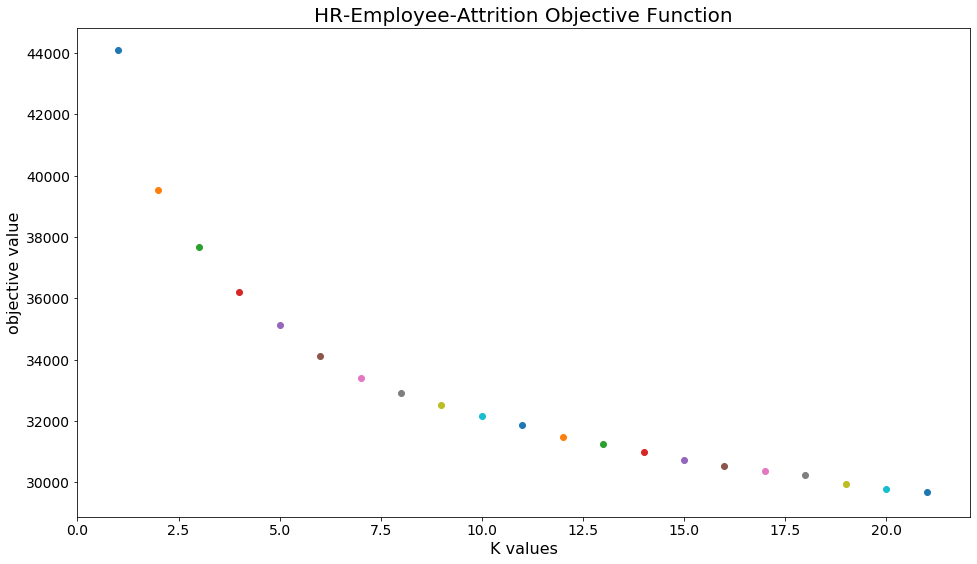

In [103]:
# your code here
for i in range(21):
    model = KMeans(n_clusters = i+1, random_state=11).fit(X)
    inertia = model.inertia_
    plt.scatter(i+1, inertia)

plt.xlabel("K values")
plt.ylabel("objective value")
plt.title("HR-Employee-Attrition Objective Function")

**Write-up!** State which 𝑘 you would choose and explain why.

### Problem 4.5

**Try this!** Using the $k$ you selected in [Problem 4.4](#Problem-4.4), create and fit a new model. Remember to save the cluster assignments and centroids.

In [104]:
# your code here
model = KMeans(n_clusters = 4, random_state = 1).fit(X)
centroids = model.cluster_centers_
assignments = model.labels_
print(X.shape)
# plt.scatter(X[:, 0], X[:, 1], c=assignments)
# plt.scatter(centroids[:, 0], centroids[:, 1], s=200, c='orange', marker='s')
# plt.legend(['data points', 'final centroids'])

# plt.xlabel("X")
# plt.ylabel("Y")
# plt.title("HR-Employee-Attrition")

(1470, 32)


### Problem 4.6

Now that we have cluster assignments from $k$-means, we need to analyze the significance of each cluster. To do that, let's return to our original DataFrame, `data`.

In the following cell, we add our cluster assignments to `data`. We also compute a pivot table which provides a summary of each cluster.

In [105]:
data['Cluster'] = assignments
pivot = data.pivot_table(index='Cluster', aggfunc=np.mean)

**Try this!** Compute the percentage of total attrition accounted for by each cluster and store the result in `pivot['% of Attrition']`.

In [108]:
# your code here

newData = np.unique(data['Cluster'])
dataLength = len(data['Cluster'])
percentageArray = []

index = 0
for i in newData:
    numerator = len(data['Cluster'][data['Cluster'] == i])
    percentage = numerator / dataLength * 100
    pivot.loc[index, '% of Attrition'] = percentage
    index+=1

#print(pivot)

assert pivot['% of Attrition'].sum() == 100, 'Sum of percentage attrition should be 1'

### Problem 4.7

Let's take a look at the results and identify potential areas for intervention to suggets to the HR department.

In [107]:
pivot.sort_values(by='% of Attrition', axis=0).T

Cluster,0,3,2,1
Age,35.441624,48.023041,36.519062,34.156643
DailyRate,790.538071,827.271889,794.149560,802.230769
DistanceFromHome,9.720812,8.769585,9.398827,9.076923
Education,2.802030,3.036866,3.046921,2.841958
EnvironmentSatisfaction,2.634518,2.760369,2.821114,2.686713
HourlyRate,65.984772,66.013825,63.700880,66.872727
JobInvolvement,2.700508,2.677419,2.777126,2.731469
JobLevel,1.730964,4.073733,2.108504,1.524476
JobSatisfaction,2.725888,2.663594,2.782991,2.723077
MonthlyIncome,5034.781726,15436.313364,6243.052786,4320.134266


**Write-up!** Describe the clusters produced and interpret their meaning. What makes each one a separate cluster? Is there anything that stands out with respect to attrition rate? What might you suggest HR look into to improve employee retention?